In [29]:
# Import pandas, numpy and matplotlib libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
import requests
import json
import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from pylab import rcParams

## Fetching the SQL information to create CSV files

未做

## Merge availability.csv and weather.csv into a new dataframe

In [30]:
# Read csv into dataframes. 
dynamicdata = pd.read_csv('availability.csv',  keep_default_na=True, skipinitialspace=True)
weatherdata = pd.read_csv('old_weather.csv',  keep_default_na=True, skipinitialspace=True)

In [31]:
dynamicdata['last_update_date'] = pd.to_datetime(dynamicdata.last_update, unit='ms')
dynamicdata

,number,available_bike_stands,available_bikes,last_update,last_update_date
0,42,18,12,1586101182000,2020-04-05 15:39:42
1,30,18,2,1586101061000,2020-04-05 15:37:41
2,54,28,5,1586100863000,2020-04-05 15:34:23
3,108,20,20,1586101170000,2020-04-05 15:39:30
4,56,24,16,1586101403000,2020-04-05 15:43:23
...,...,...,...,...,...
14316,39,11,9,1587296043000,2020-04-19 11:34:03
14317,83,20,20,1587295906000,2020-04-19 11:31:46
14318,92,33,7,1587295975000,2020-04-19 11:32:55
14319,21,28,2,1587296057000,2020-04-19 11:34:17


In [32]:
weekday_List = []
hour_List = []
for i in range(len(dynamicdata['last_update_date'])):
    z = dynamicdata.loc[i, 'last_update_date']
    weekday_List.append(z.weekday())
    hour_List.append(z.hour)
    
dynamicdata.insert(dynamicdata.columns.tolist().index('last_update_date') + 1, 'weekday', weekday_List)
dynamicdata.insert(dynamicdata.columns.tolist().index('last_update_date') + 1, 'hour', hour_List)

del dynamicdata['last_update_date']

dynamicdata.dtypes

number                   int64
available_bike_stands    int64
available_bikes          int64
last_update              int64
hour                     int64
weekday                  int64
dtype: object

In [33]:
dynamicdata = dynamicdata.groupby(["number", "hour", "weekday"], as_index = False)["available_bikes"].mean()
dynamicdata

,number,hour,weekday,available_bikes
0,2,0,6,5.0
1,2,1,6,5.0
2,2,2,6,5.0
3,2,9,1,0.0
4,2,10,6,2.0
...,...,...,...,...
3976,117,20,4,11.0
3977,117,21,3,12.0
3978,117,22,3,12.0
3979,117,23,2,8.0


In [34]:
dt_List = []
rise_List = []
set_List = []
for i in range(len(weatherdata['dt'])):
    dt_List.append(int(weatherdata.loc[i, 'dt']))
    #rise_List.append(int(weatherdata.loc[i, 'sunrise']))
    #set_List.append(int(weatherdata.loc[i, 'sunset']))
    
for i in range(len(dt_List)):
    dt_List[i] = datetime.datetime.fromtimestamp(dt_List[i])
    #rise_List[i] = datetime.fromtimestamp(rise_List[i])
    #set_List[i] = datetime.fromtimestamp(set_List[i])
    
weatherdata.insert(weatherdata.columns.tolist().index('dt') + 1, 'dt_date', dt_List)
#weatherdata.insert(weatherdata.columns.tolist().index('sunrise') + 1, 'sunrise_date', rise_List)
#weatherdata.insert(weatherdata.columns.tolist().index('sunset') + 1, 'sunset_date', set_List)
del weatherdata['dt']
del weatherdata['sunrise']
del weatherdata['sunset']
del weatherdata['rain_1h']
del weatherdata['snow_1h']



#del weatherdata["dt"]
weatherdata

,weather_main,temp,feels_like,temp_min,temp_max,pressure,humidity,visibility,wind_speed,wind_deg,clouds_all,rain_3h,snow_3h,dt_date
0,Clouds,3.43,-1.49,1.91,4.86,1006,93,10000,1.92,60,75,0,0,2020-03-25 01:40:00
1,Clouds,3.43,-1.27,1.68,4.79,1006,93,10000,1.92,60,75,0,0,2020-03-25 01:40:00
2,Clouds,6.07,1.52,4.47,6.75,1006,75,10000,2.10,90,75,0,0,2020-03-25 02:33:00
3,Clouds,7.21,2.35,5.71,8.46,1005,65,10000,2.10,70,40,0,0,2020-03-25 06:50:00
4,Clouds,7.21,3.20,6.33,8.60,1005,65,10000,2.10,70,40,0,0,2020-03-25 06:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674,Clouds,9.61,5.36,8.72,10.82,1018,66,10000,3.60,60,75,0,0,2020-04-14 02:15:00
5675,Clouds,9.70,5.51,8.55,10.63,1018,66,10000,3.60,80,75,0,0,2020-04-14 02:30:00
5676,Clouds,10.03,5.27,8.32,10.94,1018,66,10000,3.60,80,75,0,0,2020-04-14 02:35:00
5677,Clouds,9.70,5.46,8.37,10.87,1018,66,10000,3.60,80,75,0,0,2020-04-14 02:30:00


In [35]:
weekday_List = []
hour_List = []
for i in range(len(weatherdata['dt_date'])):
    z = weatherdata.loc[i, 'dt_date']
    weekday_List.append(z.weekday())
    hour_List.append(z.hour)
    
weatherdata.insert(weatherdata.columns.tolist().index('dt_date') + 1, 'weekday', weekday_List)
weatherdata.insert(weatherdata.columns.tolist().index('dt_date') + 1, 'hour', hour_List)

del weatherdata['dt_date']

weatherdata.dtypes

weather_main     object
temp            float64
feels_like      float64
temp_min        float64
temp_max        float64
pressure          int64
humidity          int64
visibility        int64
wind_speed      float64
wind_deg          int64
clouds_all        int64
rain_3h           int64
snow_3h           int64
hour              int64
weekday           int64
dtype: object

In [36]:
weatherdata

,weather_main,temp,feels_like,temp_min,temp_max,pressure,humidity,visibility,wind_speed,wind_deg,clouds_all,rain_3h,snow_3h,hour,weekday
0,Clouds,3.43,-1.49,1.91,4.86,1006,93,10000,1.92,60,75,0,0,1,2
1,Clouds,3.43,-1.27,1.68,4.79,1006,93,10000,1.92,60,75,0,0,1,2
2,Clouds,6.07,1.52,4.47,6.75,1006,75,10000,2.10,90,75,0,0,2,2
3,Clouds,7.21,2.35,5.71,8.46,1005,65,10000,2.10,70,40,0,0,6,2
4,Clouds,7.21,3.20,6.33,8.60,1005,65,10000,2.10,70,40,0,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674,Clouds,9.61,5.36,8.72,10.82,1018,66,10000,3.60,60,75,0,0,2,1
5675,Clouds,9.70,5.51,8.55,10.63,1018,66,10000,3.60,80,75,0,0,2,1
5676,Clouds,10.03,5.27,8.32,10.94,1018,66,10000,3.60,80,75,0,0,2,1
5677,Clouds,9.70,5.46,8.37,10.87,1018,66,10000,3.60,80,75,0,0,2,1


In [37]:
#weatherdata.fillna(1.0,inplace=True) # 这句后面必须要删掉
weatherdata

,weather_main,temp,feels_like,temp_min,temp_max,pressure,humidity,visibility,wind_speed,wind_deg,clouds_all,rain_3h,snow_3h,hour,weekday
0,Clouds,3.43,-1.49,1.91,4.86,1006,93,10000,1.92,60,75,0,0,1,2
1,Clouds,3.43,-1.27,1.68,4.79,1006,93,10000,1.92,60,75,0,0,1,2
2,Clouds,6.07,1.52,4.47,6.75,1006,75,10000,2.10,90,75,0,0,2,2
3,Clouds,7.21,2.35,5.71,8.46,1005,65,10000,2.10,70,40,0,0,6,2
4,Clouds,7.21,3.20,6.33,8.60,1005,65,10000,2.10,70,40,0,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674,Clouds,9.61,5.36,8.72,10.82,1018,66,10000,3.60,60,75,0,0,2,1
5675,Clouds,9.70,5.51,8.55,10.63,1018,66,10000,3.60,80,75,0,0,2,1
5676,Clouds,10.03,5.27,8.32,10.94,1018,66,10000,3.60,80,75,0,0,2,1
5677,Clouds,9.70,5.46,8.37,10.87,1018,66,10000,3.60,80,75,0,0,2,1


## Each station available Plot

In [38]:
def getAvaList(station_id, dydata, weekday):
    avaList=[]
    for i in range(0,24):
        avaData=dydata[(dydata.number == station_id) & (dydata.weekday == weekday)& (dydata.hour == i)] 
        meanBikes=avaData['available_bikes'].mean()
        avaList.append(meanBikes)
    return avaList

In [39]:
station_id_List=[]
for num in dynamicdata['number']:
    if num not in station_id_List:
        station_id_List.append(num)

In [40]:
weekday_List=[]
for weekday in dynamicdata['weekday']:
    if weekday not in weekday_List:
        weekday_List.append(weekday)

In [41]:
hour_List=[]
for h in range (0,24):
    hour_List.append(h)

In [42]:
def plotStation(station_id):
    
    for i in weekday_List:
        ava_List=getAvaList(station_id, dynamicdata, i)
        plt.plot(hour_List, ava_List, label=i)


    title = plt.title("Station "+str(station_id));


    plt.xlabel('hour')
    plt.ylabel('available numbers')

    plt.show()

In [43]:
#for station_id in station_id_List:
#    plotStation(station_id)

In [44]:
df = pd.merge(dynamicdata, weatherdata, on = ["hour", "weekday"])
df

,number,hour,weekday,available_bikes,weather_main,temp,feels_like,temp_min,temp_max,pressure,humidity,visibility,wind_speed,wind_deg,clouds_all,rain_3h,snow_3h
0,2,0,6,5.0,Clouds,5.75,0.84,4.00,6.70,997,81,10000,5.7,60,75,0,0
1,2,0,6,5.0,Clouds,5.75,1.13,4.69,6.40,997,81,10000,5.7,80,75,0,0
2,2,0,6,5.0,Clouds,5.86,1.23,4.99,7.07,997,81,10000,5.7,80,75,0,0
3,2,0,6,5.0,Clouds,5.80,0.85,4.62,7.08,997,81,10000,4.6,80,75,0,0
4,2,0,6,5.0,Clouds,5.88,1.71,5.06,7.19,997,81,10000,4.6,90,75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134468,117,14,1,11.0,Rain,7.57,3.14,5.82,8.98,1017,93,10000,8.2,90,75,0,0
134469,117,14,1,11.0,Drizzle,7.24,2.67,6.01,8.25,1018,93,10000,5.1,80,75,0,0
134470,117,14,1,11.0,Drizzle,7.23,2.47,5.79,8.03,1018,93,10000,5.1,80,75,0,0
134471,117,14,1,11.0,Drizzle,7.23,2.40,5.44,7.94,1018,93,10000,5.1,70,75,0,0


In [45]:
df['number'].unique()

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  15,
        16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117])

In [46]:

#df = pd.get_dummies(df)
#del df['weekday']
#del df['hour']
#del df['available_bike_stands']
df = pd.get_dummies(df)
#df['weekday'] = df['weekday'].astype('category')
#df['hour'] = df['hour'].astype('category')
#df['number'] = df['hour'].astype('category')
#del df['weather_main']
del df['visibility']
df


,number,hour,weekday,available_bikes,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,rain_3h,snow_3h,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Rain
0,2,0,6,5.0,5.75,0.84,4.00,6.70,997,81,5.7,60,75,0,0,0,1,0,0
1,2,0,6,5.0,5.75,1.13,4.69,6.40,997,81,5.7,80,75,0,0,0,1,0,0
2,2,0,6,5.0,5.86,1.23,4.99,7.07,997,81,5.7,80,75,0,0,0,1,0,0
3,2,0,6,5.0,5.80,0.85,4.62,7.08,997,81,4.6,80,75,0,0,0,1,0,0
4,2,0,6,5.0,5.88,1.71,5.06,7.19,997,81,4.6,90,75,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134468,117,14,1,11.0,7.57,3.14,5.82,8.98,1017,93,8.2,90,75,0,0,0,0,0,1
134469,117,14,1,11.0,7.24,2.67,6.01,8.25,1018,93,5.1,80,75,0,0,0,0,1,0
134470,117,14,1,11.0,7.23,2.47,5.79,8.03,1018,93,5.1,80,75,0,0,0,0,1,0
134471,117,14,1,11.0,7.23,2.40,5.44,7.94,1018,93,5.1,70,75,0,0,0,0,1,0


In [47]:
df['number'].unique()

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  15,
        16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117])

In [48]:
df = df.groupby(["number", "hour", "weekday"], as_index = False).mean()
#df.to_csv('maybeNAN.csv',sep=',',index=False,header=True)
df

,number,hour,weekday,available_bikes,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,rain_3h,snow_3h,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Rain
0,2,0,6,5.0,4.231053,-0.265526,2.996053,5.260789,1006.868421,80.710526,4.092105,77.368421,57.631579,0.0,0.0,0.0,1.000000,0.000000,0.000000
1,2,1,6,5.0,4.181304,-0.320000,2.916087,5.126957,1015.217391,82.173913,3.369565,76.521739,55.217391,0.0,0.0,0.0,1.000000,0.000000,0.000000
2,2,2,6,5.0,6.196857,1.611143,4.790286,7.222571,1008.085714,81.742857,5.457143,70.571429,61.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000
3,2,9,1,0.0,11.917083,7.378333,10.664167,12.847500,1007.416667,70.416667,9.612500,78.750000,61.875000,0.0,0.0,0.0,1.000000,0.000000,0.000000
4,2,10,6,2.0,7.413333,2.831667,6.080833,8.399444,1011.666667,68.805556,6.644444,71.666667,26.666667,0.0,0.0,0.0,0.666667,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,117,20,4,11.0,6.425000,1.901389,5.025000,7.453056,1015.305556,84.555556,4.441667,74.722222,75.000000,0.0,0.0,0.0,0.722222,0.000000,0.277778
3977,117,21,3,12.0,1.955278,-2.505556,0.688056,2.925556,1014.527778,93.361111,3.177778,78.333333,56.666667,0.0,0.0,0.0,0.694444,0.000000,0.305556
3978,117,22,3,12.0,1.854615,-2.612051,0.583077,2.808205,1015.179487,90.974359,3.369231,75.641026,46.794872,0.0,0.0,0.0,0.743590,0.102564,0.153846
3979,117,23,2,8.0,0.499118,-3.932353,-0.784118,1.462941,1010.147059,89.176471,4.367647,72.058824,49.411765,0.0,0.0,0.0,0.911765,0.000000,0.088235


In [49]:
df.dropna(axis=0, how='any', inplace=True)
df.dtypes

number                    int64
hour                      int64
weekday                   int64
available_bikes         float64
temp                    float64
feels_like              float64
temp_min                float64
temp_max                float64
pressure                float64
humidity                float64
wind_speed              float64
wind_deg                float64
clouds_all              float64
rain_3h                 float64
snow_3h                 float64
weather_main_Clear      float64
weather_main_Clouds     float64
weather_main_Drizzle    float64
weather_main_Rain       float64
dtype: object

In [50]:
dependent_variable = 'available_bikes'
X = df[df.columns.difference([dependent_variable])]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#print(X_train)
#print(y_train)
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
with open('model.pkl', 'wb') as handle:     
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL) 

In [52]:
print("Traing Score:%f"%model.score(X_train,y_train))
print("Testing Score:%f"%model.score(X_test,y_test))

Traing Score:0.955674
Testing Score:-0.557400


In [53]:
X_test

,clouds_all,feels_like,hour,humidity,number,pressure,rain_3h,snow_3h,temp,temp_max,temp_min,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Rain,weekday,wind_deg,wind_speed
2786,49.411765,-3.932353,23,89.176471,84,1010.147059,0.0,0.0,0.499118,1.462941,-0.784118,0.0,0.911765,0.000000,0.088235,2,72.058824,4.367647
2787,44.090909,-2.770909,23,89.242424,84,1015.000000,0.0,0.0,1.683636,2.713939,0.345152,0.0,0.606061,0.303030,0.090909,3,76.666667,2.836364
2788,57.631579,-0.265526,0,80.710526,85,1006.868421,0.0,0.0,4.231053,5.260789,2.996053,0.0,1.000000,0.000000,0.000000,6,77.368421,4.092105
2789,55.217391,-0.320000,1,82.173913,85,1015.217391,0.0,0.0,4.181304,5.126957,2.916087,0.0,1.000000,0.000000,0.000000,6,76.521739,3.369565
2790,61.000000,1.611143,2,81.742857,85,1008.085714,0.0,0.0,6.196857,7.222571,4.790286,0.0,1.000000,0.000000,0.000000,6,70.571429,5.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,75.000000,1.901389,20,84.555556,117,1015.305556,0.0,0.0,6.425000,7.453056,5.025000,0.0,0.722222,0.000000,0.277778,4,74.722222,4.441667
3977,56.666667,-2.505556,21,93.361111,117,1014.527778,0.0,0.0,1.955278,2.925556,0.688056,0.0,0.694444,0.000000,0.305556,3,78.333333,3.177778
3978,46.794872,-2.612051,22,90.974359,117,1015.179487,0.0,0.0,1.854615,2.808205,0.583077,0.0,0.743590,0.102564,0.153846,3,75.641026,3.369231
3979,49.411765,-3.932353,23,89.176471,117,1010.147059,0.0,0.0,0.499118,1.462941,-0.784118,0.0,0.911765,0.000000,0.088235,2,72.058824,4.367647


In [54]:
X_test.to_csv('X_test.csv',sep=',',index=False,header=True)
model_predict = model.predict(X_test)
model_predict

array([14.03966667, 13.06933333, 11.011     , ..., 13.39466667,
       14.03966667, 13.06933333])

In [55]:
# Calculate the absolute errors
errors = abs(model_predict - y_test)
# Print out the mean absolute error 
print('Mean Absolute Error:', round(np.mean(errors), 2), 'bikes.')
print('Standard Deviation:', round(np.std(errors), 2), 'bikes.')

Mean Absolute Error: 5.16 bikes.
Standard Deviation: 4.22 bikes.


(array([441., 289., 208., 138.,  74.,  28.,   9.,   5.,   2.,   1.]),
 array([2.00000000e-03, 2.78966667e+00, 5.57733333e+00, 8.36500000e+00,
        1.11526667e+01, 1.39403333e+01, 1.67280000e+01, 1.95156667e+01,
        2.23033333e+01, 2.50910000e+01, 2.78786667e+01]),
 <a list of 10 Patch objects>)

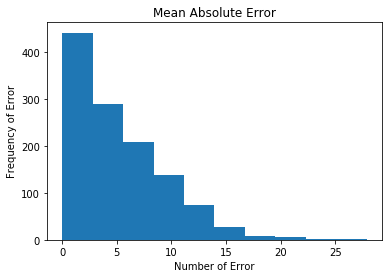

In [56]:
plt.title('Mean Absolute Error')
plt.xlabel('Number of Error')
plt.ylabel('Frequency of Error')
plt.hist(errors)